# Coercion clustering techniques krok 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/wmoszczy/2/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
## 440 klientów według 7 cech

data.shape

(440, 8)

In [4]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [5]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## NORMALIZACJA

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

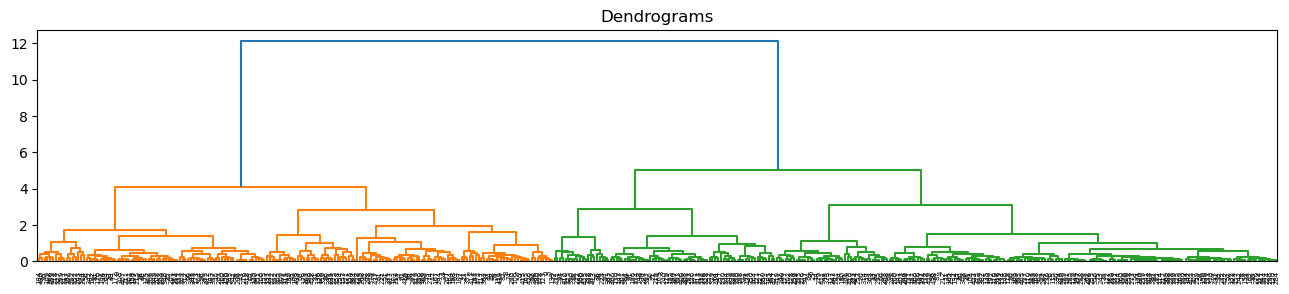

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Oś x zawiera próbki, a oś y przedstawia odległość między tymi próbkami. Linia pionowa z maksymalną odległością jest linią niebieską, dlatego możemy ustalić próg 6 i wyciąć dendrogram:

## Co to za próbki?

In [8]:
data2 = data.head(20)

In [9]:
data_scaled2 = normalize(data2)
data_scaled2 = pd.DataFrame(data_scaled2, columns=data2.columns)
data_scaled2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


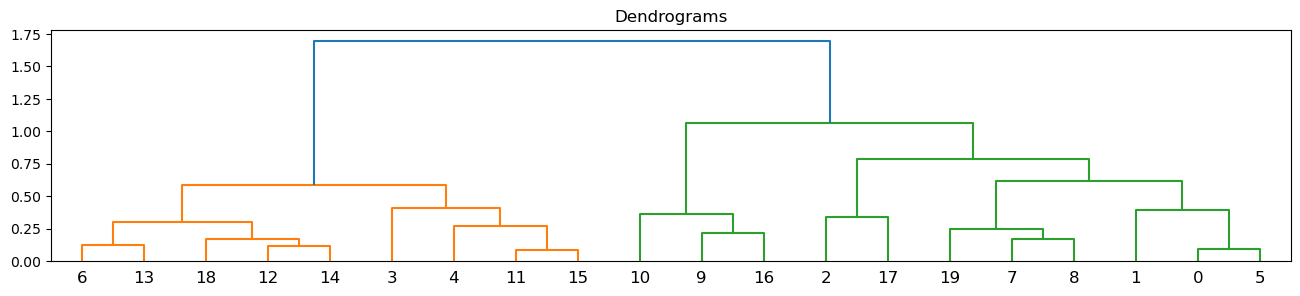

In [10]:
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))

# Analizujemy próbkę ('transakcji') 6 i 13

In [11]:
data_scaled2.loc[[6, 13], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
13,0.000072,0.000108,0.765560,0.223999,0.540586,0.111675,0.242004,0.021722


# Analizujemy próbkę ('transakcji') 11 i 15

In [12]:
data_scaled2.loc[[11, 15], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,0.000142,0.000214,0.936369,0.080061,0.322166,0.101144,0.039104,0.035401
15,0.000090,0.000271,0.927421,0.100765,0.345623,0.035910,0.087197,0.037267


## Czy można takie coś zrobić dla klientów a nie dla transakcji?

Tworzę grupę 100 fikcyjnych klientów

In [13]:
data7 = data

In [14]:
data7['ID_custom1'] = (data7['Fresh']*4)+(data7['Frozen']*3)+ data7['Grocery']+(data7['Milk']/2)

In [15]:
data7['ID_customer'] = pd.qcut(data7['ID_custom1'],18)

In [16]:
data7['ID_customer'].value_counts()

(2877.499, 13680.778]       25
(41422.778, 46323.278]      25
(104718.083, 131495.056]    25
(71541.167, 82387.778]      25
(57760.111, 63776.722]      25
(169432.833, 531800.5]      25
(33120.25, 36258.5]         25
(19221.667, 24017.833]      25
(36258.5, 41422.778]        24
(46323.278, 53507.5]        24
(13680.778, 19221.667]      24
(28670.222, 33120.25]       24
(63776.722, 71541.167]      24
(24017.833, 28670.222]      24
(82387.778, 91823.556]      24
(91823.556, 104718.083]     24
(131495.056, 169432.833]    24
(53507.5, 57760.111]        24
Name: ID_customer, dtype: int64

### Koduje przedziały robiąc z nich ID

In [17]:
data7['ID_customer'] = pd.Categorical(data7['ID_customer']).codes
data7['ID_customer'].value_counts()

10    25
7     25
12    25
15    25
5     25
2     25
0     25
17    25
13    24
6     24
11    24
1     24
14    24
9     24
8     24
4     24
16    24
3     24
Name: ID_customer, dtype: int64

In [18]:
data7.reset_index()
data7 = data7.set_index(data7.ID_customer) 
#del data7.ID_customer
#del data7.ID_custom2
#del data7.ID_custom1

data7

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ID_custom1,ID_customer
ID_customer,,,,,,,,,,
10,2,3,12669,9656,7561,214,2674,1338,63707.0,10
8,2,3,7057,9810,9568,1762,3293,1776,47987.0,8
7,2,3,6353,8808,7684,2405,3516,7844,44715.0,7
12,1,3,13265,1196,4221,6404,507,1788,77091.0,12
15,2,3,22615,5410,7198,3915,1777,5185,112108.0,15
...,...,...,...,...,...,...,...,...,...,...
17,1,3,29703,12051,16027,13135,182,2204,180269.5,17
17,1,3,39228,1431,764,4510,93,2346,171921.5,17
14,2,3,14531,15488,30243,437,14841,1867,97422.0,14


In [23]:
data8 = data7[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]
data8.shape

(440, 8)

In [24]:
data8.sample(6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
ID_customer,,,,,,,,
5,1,3,2446,7260,3993,5870,788,3095
0,1,3,518,4180,3600,659,122,654
4,1,3,6338,2256,1668,1492,311,686
14,1,3,19219,1840,1658,8195,349,483
16,1,3,11314,3090,2062,35009,71,2698
7,2,3,8590,3045,7854,96,4095,225


## NORMALIZACJA

In [30]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler (feature_range = (0, 1)) 

data8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = scaler.fit_transform (data8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

/tmp/ipykernel_32385/3335932749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',


In [31]:
data8

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
ID_customer,,,,,,,,
10,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
8,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
7,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
12,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
15,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
17,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
17,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
14,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882


In [32]:
data8.Region.value_counts()

1.0    316
0.0     77
0.5     47
Name: Region, dtype: int64

##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

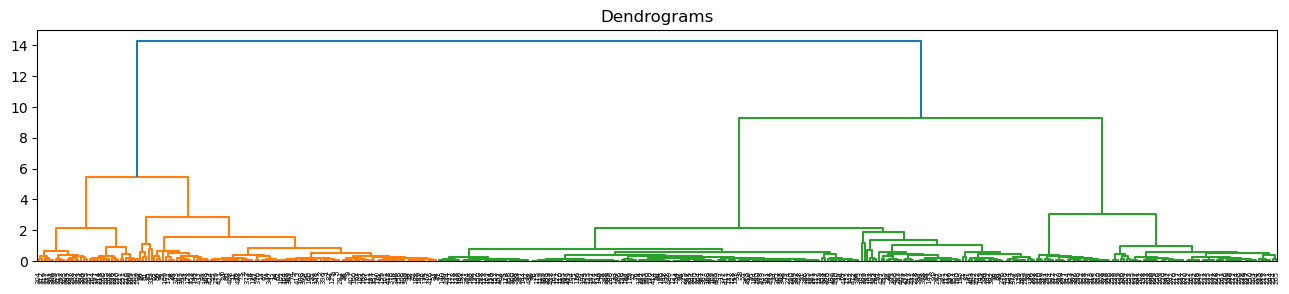

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data8, method='ward'))

# ZNOWU 400 OPERACJI